In [104]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [105]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [106]:
len(X_train)

60000

In [107]:
len(X_test)

10000

In [108]:
X_train[0].shape

(28, 28)

In [109]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

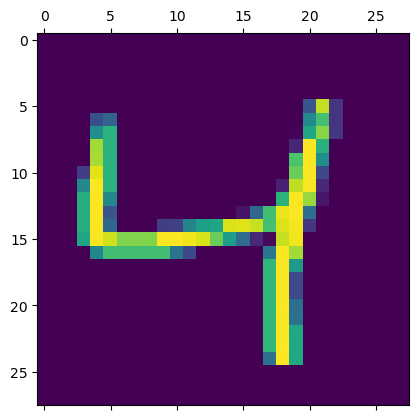

In [110]:
plt.matshow(X_train[2])

In [111]:
y_train[2]

4

In [112]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [113]:
X_train=X_train/255
X_test=X_test/255

In [114]:
X_flat=X_train.reshape(len(X_train),28*28)
X_f=X_test.reshape(len(X_test),28*28)

In [115]:
X_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [116]:
model=keras.Sequential([
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1840 - accuracy: 0.9440
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0793 - accuracy: 0.9755
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0538 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0385 - accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0318 - accuracy: 0.9896


In [117]:
model.evaluate(X_f,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0783 - accuracy: 0.9781


[0.07833972573280334, 0.9781000018119812]

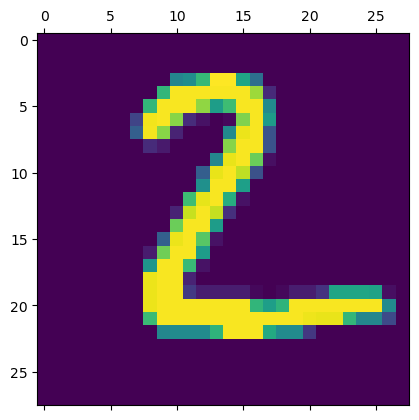

In [118]:
plt.matshow(X_test[1])

In [119]:
y_predict=model.predict(X_f)
y_predict[1]

313/313 [==============================] - 2s 6ms/step


array([1.3876766e-03, 9.4471169e-01, 9.9999982e-01, 9.7336876e-01,
       9.4802608e-08, 1.8658354e-03, 3.0733729e-06, 6.3559949e-01,
       3.3195159e-01, 1.5072864e-07], dtype=float32)

In [120]:
np.argmax(y_predict[1])

2

In [121]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [122]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [123]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    4,    1,    1,    1,    1,    1,    1,    2],
       [   0, 1125,    1,    1,    0,    1,    2,    1,    4,    0],
       [   1,    0, 1018,    3,    1,    0,    1,    6,    2,    0],
       [   0,    0,    3,  990,    0,    2,    0,    5,    2,    8],
       [   2,    0,    4,    0,  947,    0,    2,    3,    0,   24],
       [   2,    0,    0,   10,    0,  868,    1,    1,    2,    8],
       [   5,    2,    3,    1,    7,   10,  928,    0,    2,    0],
       [   0,    0,    6,    0,    0,    0,    0, 1017,    0,    5],
       [   1,    0,    6,   12,    3,    4,    1,   14,  924,    9],
       [   0,    2,    0,    3,    5,    1,    0,    3,    0,  995]])>

Text(95.72222222222221, 0.5, 'Truth')

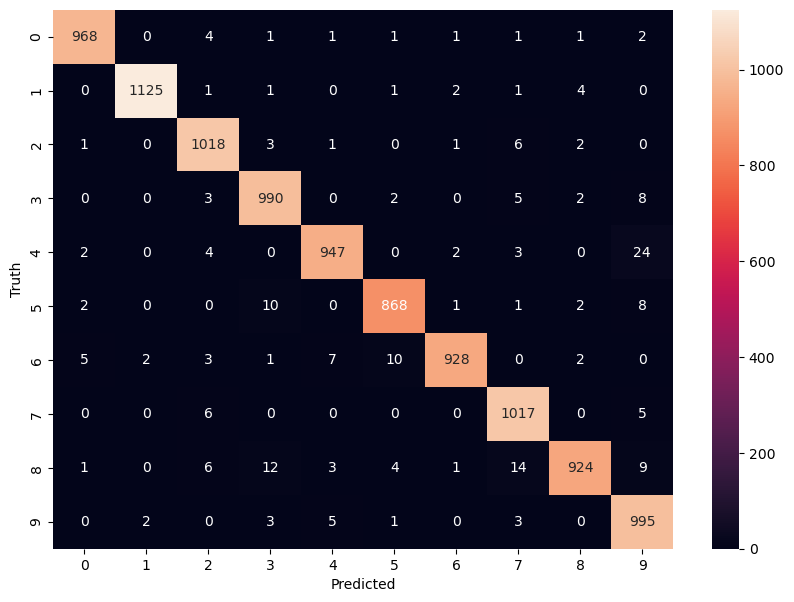

In [124]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [125]:
model=keras.Sequential([
    keras.layers.Dense(1000,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_flat, y_train, epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5279 - accuracy: 0.8676
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2588 - accuracy: 0.9262
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2067 - accuracy: 0.9414
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1734 - accuracy: 0.9509
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1495 - accuracy: 0.9575


In [126]:
model.evaluate(X_f,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1404 - accuracy: 0.9585


[0.14043626189231873, 0.9585000276565552]

313/313 [==============================] - 2s 6ms/step


Text(95.72222222222221, 0.5, 'Truth')

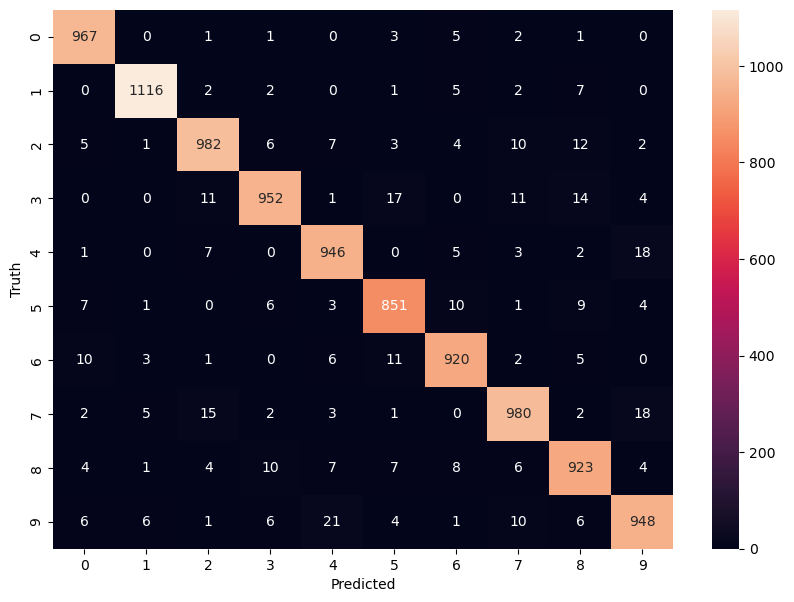

In [127]:
y_predict=model.predict(X_f)
y_predicted_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [128]:
np.argmax(y_predict[999])

9

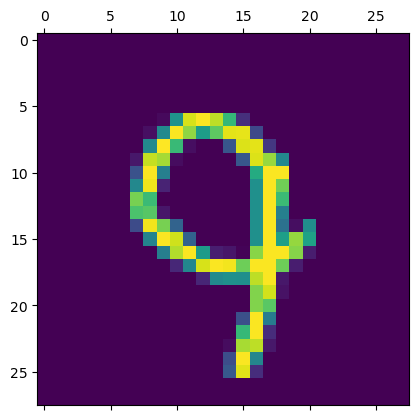

In [129]:
plt.matshow(X_test[999])

In [130]:
%load_ext tensorboard
%tensorboard --logdir logs/fit